In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,GradientBoostingClassifier
from sklearn.model_selection import cross_val_score,KFold,cross_validate,train_test_split
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import export_graphviz,DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier,AdaBoostClassifier,RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier  
from sklearn.cluster import KMeans
from datetime import datetime

import plotly.graph_objs as go#visualization
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly
init_notebook_mode(connected=True)

import eli5

In [2]:
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [3]:
df = pd.read_csv('20170504_test_download.csv', sep='\t',error_bad_lines=False)

In [4]:
df.shape

(84130, 161)

In [5]:
df.drop_duplicates(subset=df.columns).shape

(84130, 161)

In [6]:
df.head()

,account_id,client_id,time_msw,test_cr_decision,test_cr_performance,dep_var,month_verif,var1,var2,var3,...,var145,var146,var147,var148,var149,var150,var151,var152,var153,var154
0,Company2,211804,2016-09-01 00:11:59,RJC,NaN,NaN,201609,1.0,1,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,3
1,Company2,211807,2016-09-01 00:19:46,APR,OK,0.0,201609,1.0,1,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,7
2,Company2,211808,2016-09-01 00:25:44,RJC,NaN,NaN,201609,1.0,1,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,3
3,Company2,193611,2016-09-01 00:40:53,APR,OK,0.0,201609,NaN,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,3
4,Company2,7233,2016-09-01 00:49:33,RJC,NaN,NaN,201609,NaN,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,3


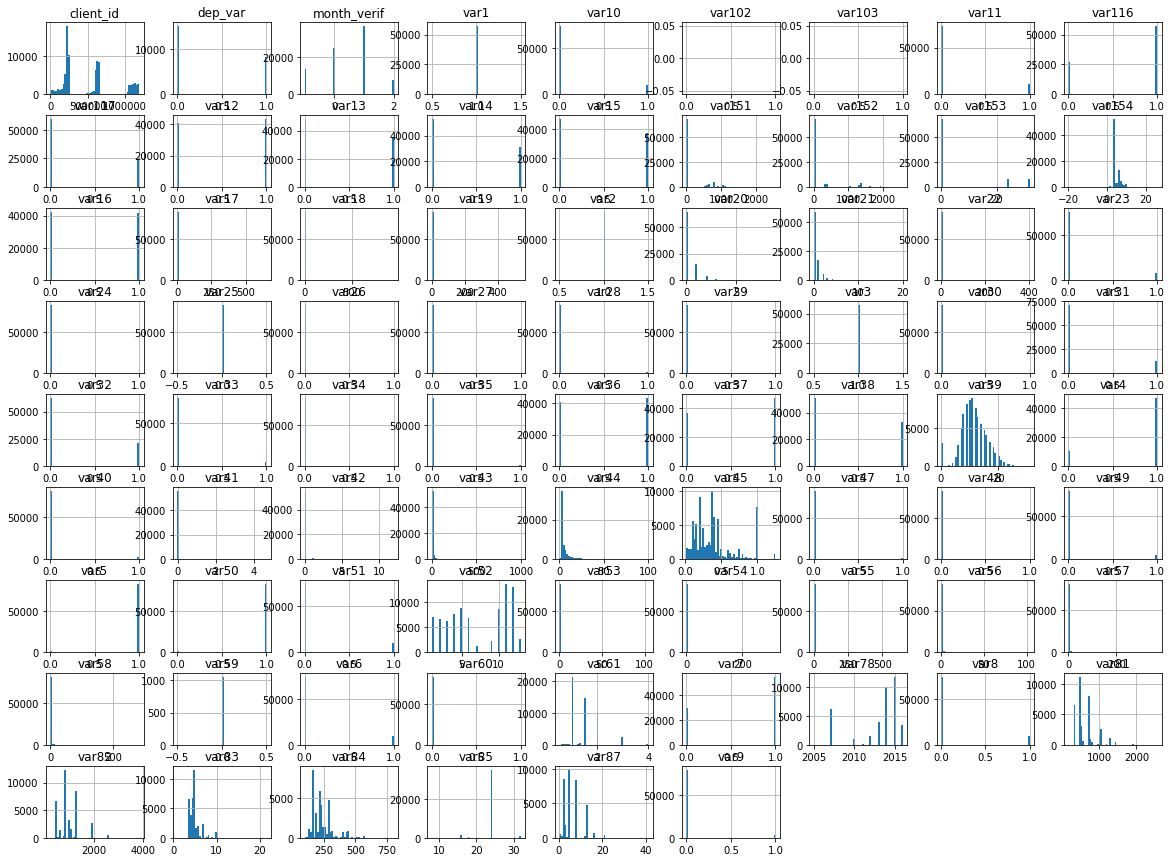

In [7]:
%matplotlib inline
df.hist(bins=50, figsize=(20,15))
plt.show()

In [8]:
(df.isnull() == True).any().value_counts()

True     99
False    62
dtype: int64

In [9]:
for i in df.columns:
    print("%s:" %i,len(df[i].unique()))

account_id: 3
client_id: 71455
time_msw: 79375
test_cr_decision: 2
test_cr_performance: 4
dep_var: 3
month_verif: 4
var1: 2
var2: 1
var3: 2
var4: 3
var5: 2
var6: 2
var7: 2
var8: 2
var9: 2
var10: 2
var11: 2
var12: 2
var13: 2
var14: 2
var15: 2
var16: 2
var17: 595
var18: 623
var19: 469
var20: 9
var21: 18
var22: 382
var23: 2
var24: 2
var25: 1
var26: 2
var27: 2
var28: 2
var29: 2
var30: 2
var31: 2
var32: 2
var33: 2
var34: 2
var35: 2
var36: 2
var37: 2
var38: 2
var39: 32
var40: 2
var41: 6711
var42: 12
var43: 162
var44: 69
var45: 147
var46: 11
var47: 2
var48: 2
var49: 2
var50: 2
var51: 2
var52: 12
var53: 104
var54: 270
var55: 419
var56: 104
var57: 276
var58: 469
var59: 2
var60: 2
var61: 85
var62: 15
var63: 2
var64: 3
var65: 2
var66: 2
var67: 2
var68: 2
var69: 2
var70: 3
var71: 2
var72: 3
var73: 8
var74: 215
var75: 1649
var76: 1116
var77: 145
var78: 12
var79: 3
var80: 3
var81: 28
var82: 30
var83: 89
var84: 150
var85: 6
var86: 3
var87: 40
var88: 3
var89: 3
var90: 3
var91: 3
var92: 3
var93: 3
var9

In [10]:
for i in df.columns:
    if len(df[i].unique()) == 1:
        df = df.drop(columns=[i])

In [11]:
for i in df.columns:
    count_nan = df[i].isna().sum()
    print("В столбце %s: %s неизвестных (%s проц.)" %(i,count_nan,count_nan/df.shape[0]))

В столбце account_id: 0 неизвестных (0.0 проц.)
В столбце client_id: 0 неизвестных (0.0 проц.)
В столбце time_msw: 0 неизвестных (0.0 проц.)
В столбце test_cr_decision: 0 неизвестных (0.0 проц.)
В столбце test_cr_performance: 60679 неизвестных (0.7212528230120052 проц.)
В столбце dep_var: 60640 неизвестных (0.7207892547248306 проц.)
В столбце month_verif: 0 неизвестных (0.0 проц.)
В столбце var1: 26675 неизвестных (0.31706882206109593 проц.)
В столбце var3: 26675 неизвестных (0.31706882206109593 проц.)
В столбце var4: 26675 неизвестных (0.31706882206109593 проц.)
В столбце var5: 0 неизвестных (0.0 проц.)
В столбце var6: 0 неизвестных (0.0 проц.)
В столбце var7: 0 неизвестных (0.0 проц.)
В столбце var8: 0 неизвестных (0.0 проц.)
В столбце var9: 0 неизвестных (0.0 проц.)
В столбце var10: 0 неизвестных (0.0 проц.)
В столбце var11: 0 неизвестных (0.0 проц.)
В столбце var12: 0 неизвестных (0.0 проц.)
В столбце var13: 0 неизвестных (0.0 проц.)
В столбце var14: 0 неизвестных (0.0 проц.)
В сто

In [12]:
df.var151.unique()

array([   0,  768,  900,  534,  480, 1080, 1024,  601,  640,  570,  600,
       1050,  568,  976,  960,  800, 1280,  720,  840,  667,  904,  864,
        731,  592, 1920,  732,  784, 1188, 1232,  962, 1184,  819, 1187,
        642,  854, 1200,  552,  657,  855,  750,  540,  801,  853, 1067,
        736,  569,  992,  671,  614,  595,  660,  782, 1138,  320, 1776,
        549, 2560,  427,  563,  808,  818,  945,  698,  360,  541,  912,
        697, 1440,  786,  347,  391,  598,  752,  762,  512,  490, 1000,
        888,  651,  521,  914,  533,  615,  857,  806, 1078, 1029, 1128,
       1824,  764, 1216,  745,  787,  522,  585,  559,  690, 1182, 1400,
        722,  858,  820,  591,  765,  931,  699,  553,  606,  547,  384,
        432,  831,  728, 1019,  961,  675,  635,  684,  627,  285, 1217,
        603,  638,  406,  551,  617,  492, 1205,  982,  530, 1208,  664,
        700,  712,  628, 1090,  964, 1105, 1152,  943, 1038,  753, 1812,
        971,  668,  986,  975])

In [13]:
df.dep_var.value_counts()

0.0    15177
1.0     8313
Name: dep_var, dtype: int64

In [14]:
len(df[df.dep_var.isna() == False ].index),len(df[df.dep_var.isna() == True ].index)

(23490, 60640)

In [15]:
ind = df[df.dep_var.isna() == False ].index

train = df.loc[ind]

In [16]:
train.head()

,account_id,client_id,time_msw,test_cr_decision,test_cr_performance,dep_var,month_verif,var1,var3,var4,...,var145,var146,var147,var148,var149,var150,var151,var152,var153,var154
1,Company2,211807,2016-09-01 00:19:46,APR,OK,0.0,201609,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,7
3,Company2,193611,2016-09-01 00:40:53,APR,OK,0.0,201609,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,3
10,Company2,211812,2016-09-01 01:31:51,APR,OK,0.0,201609,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,3
11,Company2,211814,2016-09-01 01:42:15,APR,OK,0.0,201609,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,3
13,Company2,56232,2016-09-01 02:30:43,APR,OK,0.0,201609,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,3


In [17]:
((df.dtypes == object) == True).value_counts()

True     83
False    74
dtype: int64

In [19]:
object_feat = []
for col in train.columns:
    if (train[col].dtypes == object):
        object_feat.append(col)

In [20]:
X = train.drop(columns=['dep_var'])
y = train.dep_var
holdout = df.loc[df[df.dep_var.isna() == True ].index]

In [21]:
X = X.fillna(0)

In [27]:
for i in object_feat:
    X[i] = pd.factorize(X[i])[0]

In [23]:
def cv_meth(X, y, model,cv=5, scoring='roc_auc',fillna=0):
    for i in object_feat:
        X[i] = pd.factorize(X[i])[0]
    X = X.fillna(fillna)
    cv_score = cross_val_score(model, X, y, cv=cv, scoring=scoring,n_jobs=-1) 
    return np.mean(cv_score)

In [28]:
# Spot Check Algorithms
models = []
models.append(('LC', LogisticRegression()))
models.append(('AdaBoostClassifier', AdaBoostClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RandomForest', RandomForestClassifier()))
models.append(('GB' ,GradientBoostingClassifier()))
models.append(('LGBM',LGBMClassifier()))
models.append(('XGB', XGBClassifier()))

results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=5, random_state=17)
    cv_results = cross_val_score(model, X, y, cv=kfold, scoring='roc_auc')
    results.append(cv_results)
    names.append(name)
    msg = "%s: score:%f (std: %f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LC: score:0.613130 (std: 0.006344)
AdaBoostClassifier: score:1.000000 (std: 0.000000)
KNN: score:0.535019 (std: 0.022292)
CART: score:1.000000 (std: 0.000000)
RandomForest: score:0.995292 (std: 0.005617)
GB: score:1.000000 (std: 0.000000)
LGBM: score:1.000000 (std: 0.000000)
XGB: score:1.000000 (std: 0.000000)


In [29]:
clf = RandomForestClassifier()

In [30]:
clf.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

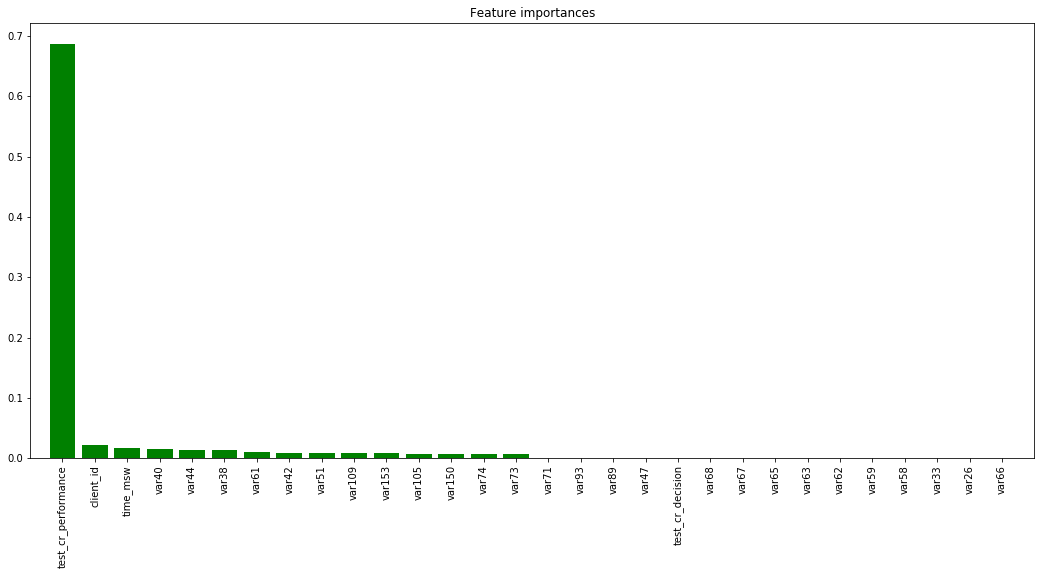

In [31]:
feat_names = df.columns
importances = clf.feature_importances_
# indices = np.argsort(importances)
indices = np.concatenate([np.argsort(importances)[::-1][:15],np.argsort(importances)[::-1][-15:]])

plt.figure(figsize=(18,8))
plt.title("Feature importances")
plt.bar(range(len(indices)), importances[indices], color="g", align="center")
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical')
plt.xlim([-1, len(indices)])
plt.show()

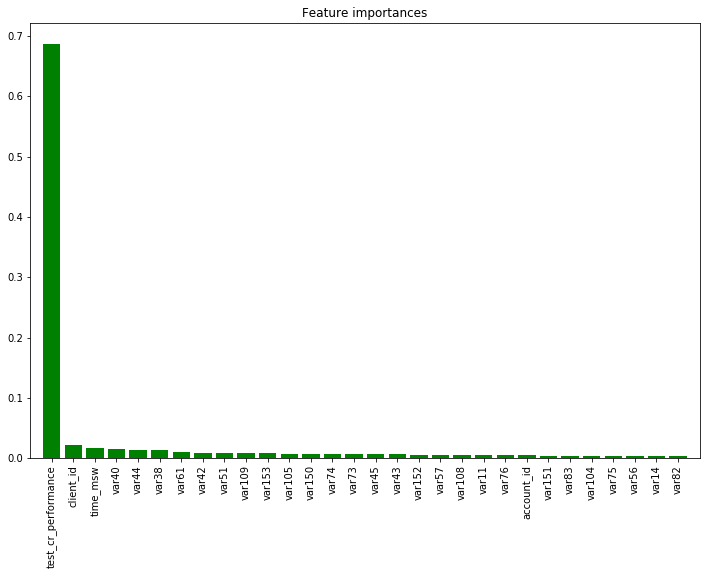

In [32]:
less_important = np.argsort(importances)[::-1][:30]
plt.figure(figsize=(12,8))
plt.title("Feature importances")
plt.bar(range(len(less_important)), importances[less_important], color="g", align="center")
plt.xticks(range(len(less_important)), feat_names[less_important], rotation='vertical')
plt.xlim([-1, len(less_important)])
plt.show()

The most important feature

In [33]:
df.test_cr_performance.value_counts()

OK        14532
NPL90+     8313
NPL90-      606
Name: test_cr_performance, dtype: int64

In [34]:
cr_performance_feat = train.test_cr_performance.unique()

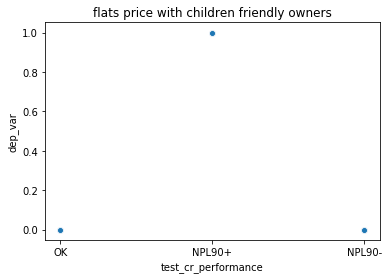

In [35]:
sns.scatterplot(x='test_cr_performance', y='dep_var', data=df);
plt.title('flats price with children friendly owners');

In [36]:
clf = RandomForestClassifier()
cv_score = cross_val_score(clf, X, y, cv=5, scoring='roc_auc')
print(np.mean(cv_score))

0.9919510276669226


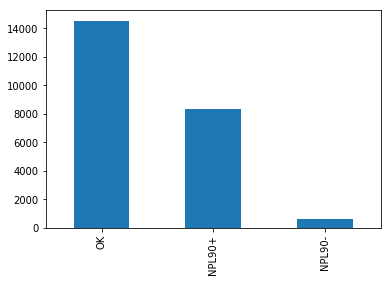

In [37]:
df['test_cr_performance'].value_counts().plot(kind='bar')

In [38]:
pd.crosstab(df['dep_var'], df['test_cr_performance'], margins=True)

test_cr_performance,NPL90+,NPL90-,OK,All
dep_var,,,,
0.0,0,606,14532,15138
1.0,8313,0,0,8313
All,8313,606,14532,23451


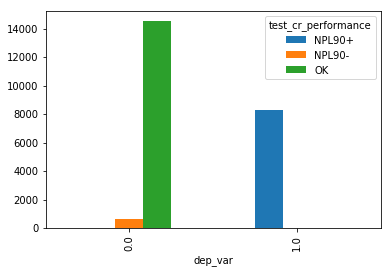

In [39]:
pd.crosstab(df['dep_var'], df['test_cr_performance']).plot(kind='bar')

In [40]:
pd.crosstab(train['dep_var'], train['test_cr_performance'], margins=True)

test_cr_performance,NPL90+,NPL90-,OK,All
dep_var,,,,
0.0,0,606,14532,15138
1.0,8313,0,0,8313
All,8313,606,14532,23451


Фича test_cr_performance дублирует таргет. Для фичей без таргета test_cr_performance не определена. Для обучения на train лучше удалить.

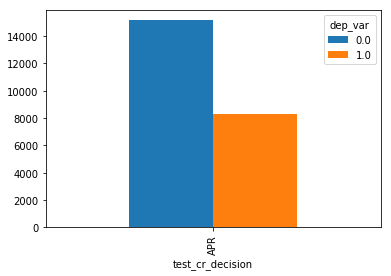

In [41]:
pd.crosstab(df['test_cr_decision'],df['dep_var']).plot(kind='bar')

In [42]:
df.test_cr_decision.value_counts()

RJC    60640
APR    23490
Name: test_cr_decision, dtype: int64

In [43]:
train.test_cr_decision.value_counts()

APR    23490
Name: test_cr_decision, dtype: int64

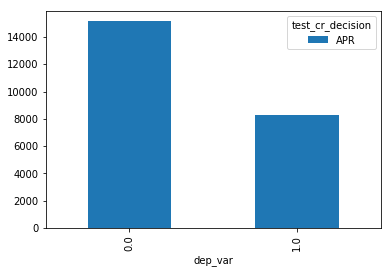

In [44]:
pd.crosstab(train['dep_var'], train['test_cr_decision']).plot(kind='bar')

In [45]:
pd.crosstab(train['dep_var'], train['test_cr_decision'], margins=True)

test_cr_decision,APR,All
dep_var,,
0.0,15177,15177
1.0,8313,8313
All,23490,23490


In [46]:
train = train.drop(columns=['test_cr_decision'])

In [47]:
cv_score = cross_val_score(clf, X.drop(columns=['test_cr_performance']), y, cv=7, scoring='roc_auc')
print('ROC-AUC:',np.mean(cv_score))

ROC-AUC: 0.5237824996281117


In [48]:
train = train.drop(columns=['test_cr_performance'])

In [61]:
object_feat.remove('test_cr_performance','test_cr_decision')

In [50]:
X = train.drop(columns=['dep_var'])

In [62]:
scores_lgbm = []
for j in range(10,201,10):
    score = cv_meth(X,y,LGBMClassifier(n_estimators=j),cv=kfold, scoring='roc_auc')
    scores_lgbm.append(score)

In [63]:
trace1 = go.Scatter(
    x=[i for i in range(10,201,10)],
    y=scores_lgbm
)
data = [trace1]
layout = go.Layout(title = 'Кривая валидации по подбору кол-ва деревьев LGBM',
          yaxis={'title':'roc-auc'}, xaxis={'title':'Кол-во'})

fig = go.Figure(data=data, layout=layout)
iplot(fig, show_link=False)

In [64]:
scores_lgbm_dep = []
for j in range(20):
    score = cv_meth(X,y,LGBMClassifier(n_estimators=30,max_depth=j),cv=kfold, scoring='roc_auc')
    scores_lgbm_dep.append(score)

In [65]:
trace1 = go.Scatter(
    x=[i for i in range(20)],
    y=scores_lgbm_dep
)
data = [trace1]
layout = go.Layout(title = 'Кривая валидации по подбору глубины дерева LGBM',
          yaxis={'title':'roc-auc'}, xaxis={'title':'Глубина деревьев'})

fig = go.Figure(data=data, layout=layout)
iplot(fig, show_link=False)

In [66]:
scores_xgb = []
for j in range(10,201,10):
    score = cv_meth(X,y,XGBClassifier(n_estimators=j),cv=kfold, scoring='roc_auc')
    scores_xgb.append(score)

In [67]:
trace1 = go.Scatter(
    x=[i for i in range(10,201,10)],
    y=scores_xgb
)
data = [trace1]
layout = go.Layout(title = 'Кривая валидации по подбору кол-ва деревьев XGB',
          yaxis={'title':'roc-auc'}, xaxis={'title':'Глубина деревьев'})

fig = go.Figure(data=data, layout=layout)
iplot(fig, show_link=False)

In [68]:
range_C = list(np.linspace(0.1,1,11)) + list(range(2, 10))
scores_lg_c = []
for j in range_C:
    score = cv_meth(X,y,LogisticRegression(C=j),cv=kfold, scoring='roc_auc')
    scores_lg_c.append(score)

In [69]:
trace1 = go.Scatter(
    x=range_C,
    y=scores_lg_c
)
data = [trace1]
layout = go.Layout(title = 'Кривая валидации по подбору C LogC',
          yaxis={'title':'roc-auc'}, xaxis={'title':'C'})

fig = go.Figure(data=data, layout=layout)
iplot(fig, show_link=False)

In [70]:
train.head()

,account_id,client_id,time_msw,dep_var,month_verif,var1,var3,var4,var5,var6,...,var145,var146,var147,var148,var149,var150,var151,var152,var153,var154
1,Company2,211807,2016-09-01 00:19:46,0.0,201609,1.0,1.0,1.0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,7
3,Company2,193611,2016-09-01 00:40:53,0.0,201609,NaN,NaN,NaN,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,3
10,Company2,211812,2016-09-01 01:31:51,0.0,201609,1.0,1.0,1.0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,3
11,Company2,211814,2016-09-01 01:42:15,0.0,201609,1.0,1.0,1.0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,3
13,Company2,56232,2016-09-01 02:30:43,0.0,201609,1.0,1.0,1.0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,3


In [72]:
cv_score = cross_val_score(clf, X, y, cv=7, scoring='accuracy')
print('accuracy:',np.mean(cv_score))

accuracy: 0.5621189277895434


In [73]:
cv_score = cross_val_score(clf, X, y, cv=7, scoring='roc_auc')
print('roc_auc:',np.mean(cv_score))

roc_auc: 0.5187291383612566


Logistic Regression

In [36]:
# LR = LogisticRegression()

# scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
# scores = cross_validate(LR, X, y, scoring=scoring, cv=20)

# sorted(scores.keys())
# LR_fit_time = scores['fit_time'].mean()
# LR_score_time = scores['score_time'].mean()
# LR_accuracy = scores['test_accuracy'].mean()
# LR_precision = scores['test_precision_macro'].mean()
# LR_recall = scores['test_recall_macro'].mean()
# LR_f1 = scores['test_f1_weighted'].mean()
# LR_roc = scores['test_roc_auc'].mean()

Decision Tree Classifier

In [ ]:
# decision_tree = DecisionTreeClassifier()

# scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
# scores = cross_validate(decision_tree, X, y, scoring=scoring, cv=20)

# sorted(scores.keys())
# dtree_fit_time = scores['fit_time'].mean()
# dtree_score_time = scores['score_time'].mean()
# dtree_accuracy = scores['test_accuracy'].mean()
# dtree_precision = scores['test_precision_macro'].mean()
# dtree_recall = scores['test_recall_macro'].mean()
# dtree_f1 = scores['test_f1_weighted'].mean()
# dtree_roc = scores['test_roc_auc'].mean()

Support Vector Machine

In [ ]:
# SVM = SVC(probability = True)

# scoring = ['accuracy','precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
# scores = cross_validate(SVM, X, y, scoring=scoring, cv=20)

# sorted(scores.keys())
# SVM_fit_time = scores['fit_time'].mean()
# SVM_score_time = scores['score_time'].mean()
# SVM_accuracy = scores['test_accuracy'].mean()
# SVM_precision = scores['test_precision_macro'].mean()
# SVM_recall = scores['test_recall_macro'].mean()
# SVM_f1 = scores['test_f1_weighted'].mean()
# SVM_roc = scores['test_roc_auc'].mean()

Random Forest Classifier

In [ ]:
# random_forest = RandomForestClassifier()

# scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
# scores = cross_validate(random_forest, X, y, scoring=scoring, cv=20)

# sorted(scores.keys())
# forest_fit_time = scores['fit_time'].mean()
# forest_score_time = scores['score_time'].mean()
# forest_accuracy = scores['test_accuracy'].mean()
# forest_precision = scores['test_precision_macro'].mean()
# forest_recall = scores['test_recall_macro'].mean()
# forest_f1 = scores['test_f1_weighted'].mean()
# forest_roc = scores['test_roc_auc'].mean()

K-Nearest Neighbors

In [ ]:
# KNN = KNeighborsClassifier()

# scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
# scores = cross_validate(KNN, X, y, scoring=scoring, cv=20)

# sorted(scores.keys())
# KNN_fit_time = scores['fit_time'].mean()
# KNN_score_time = scores['score_time'].mean()
# KNN_accuracy = scores['test_accuracy'].mean()
# KNN_precision = scores['test_precision_macro'].mean()
# KNN_recall = scores['test_recall_macro'].mean()
# KNN_f1 = scores['test_f1_weighted'].mean()
# KNN_roc = scores['test_roc_auc'].mean()

In [ ]:
# models_initial = pd.DataFrame({
#     'Model'       : ['Logistic Regression', 'Decision Tree', 'Support Vector Machine', 'Random Forest', 'K-Nearest Neighbors'],
#     'Fitting time': [LR_fit_time, dtree_fit_time, SVM_fit_time, forest_fit_time, KNN_fit_time],
#     'Scoring time': [LR_score_time, dtree_score_time, SVM_score_time, forest_score_time, KNN_score_time],
#     'Accuracy'    : [LR_accuracy, dtree_accuracy, SVM_accuracy, forest_accuracy, KNN_accuracy],
#     'Precision'   : [LR_precision, dtree_precision, SVM_precision, forest_precision, KNN_precision],
#     'Recall'      : [LR_recall, dtree_recall, SVM_recall, forest_recall, KNN_recall],
#     'F1_score'    : [LR_f1, dtree_f1, SVM_f1, forest_f1, KNN_f1],
#     'AUC_ROC'     : [LR_roc, dtree_roc, SVM_roc, forest_roc, KNN_roc],
#     }, columns = ['Model', 'Fitting time', 'Scoring time', 'Accuracy', 'Precision', 'Recall', 'F1_score', 'AUC_ROC'])

# models_initial.sort_values(by='Accuracy', ascending=False)

In [74]:
train.head()

,account_id,client_id,time_msw,dep_var,month_verif,var1,var3,var4,var5,var6,...,var145,var146,var147,var148,var149,var150,var151,var152,var153,var154
1,Company2,211807,2016-09-01 00:19:46,0.0,201609,1.0,1.0,1.0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,7
3,Company2,193611,2016-09-01 00:40:53,0.0,201609,NaN,NaN,NaN,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,3
10,Company2,211812,2016-09-01 01:31:51,0.0,201609,1.0,1.0,1.0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,3
11,Company2,211814,2016-09-01 01:42:15,0.0,201609,1.0,1.0,1.0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,3
13,Company2,56232,2016-09-01 02:30:43,0.0,201609,1.0,1.0,1.0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,3


In [75]:
df.time_msw = pd.to_datetime(df.time_msw)

In [76]:
df['time_msw'].apply(lambda ts: ts.year).astype('int').unique()

array([2016])

In [77]:
df['time_msw'].apply(lambda ts: ts.month).astype('int').unique()

array([ 9, 10, 11, 12])

In [78]:
df['time_msw'].apply(lambda ts: ts.day).astype('int').unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [79]:
# df['month'] = df['time_msw'].apply(lambda ts: ts.year).astype('int').unique()

In [80]:
df.month_verif.value_counts()

201611    37287
201610    25412
201609    13813
201612     7618
Name: month_verif, dtype: int64

In [81]:
df['time_msw'].apply(lambda ts: ts.minute).astype('int').unique()

array([11, 19, 25, 40, 49, 58, 10, 12, 16, 27, 31, 42, 26, 30, 37,  0, 50,
       14, 24, 29, 36, 45, 51,  6, 18, 48, 54, 20, 47, 33, 39,  3,  9, 22,
       32, 56,  1,  7, 21, 41, 44, 46, 57,  8, 13, 17, 34, 55, 59,  2, 15,
       23, 35, 38, 43, 53, 52,  4, 28,  5])

Train

In [82]:
train.time_msw = pd.to_datetime(train.time_msw)

In [83]:
train['start_time_s'] = train['time_msw'].apply(lambda ts: 
                                                      10000 * ts.hour + ts.minute*100 + ts.second).astype('int')

In [84]:
# cv_meth(train.drop(columns=['dep_var']),y,XGBClassifier(n_estimators=10))

In [85]:
# cv_meth(train.drop(columns=['dep_var']),y,XGBClassifier(n_estimators=10),fillna=-1)

In [86]:
train['start_time_s'] = train['time_msw'].apply(lambda ts: 
                                                      10000 * ts.hour + ts.minute*100 + ts.second).astype('int')

In [87]:
train['month_verif'] = train['time_msw'].apply(lambda ts:ts.month).astype('int')

In [88]:
train['hour'] = train['time_msw'].apply(lambda ts:ts.hour).astype('int')

In [89]:
train = train.drop(columns=['month_verif','time_msw'])

Categorical feat

In [90]:
train.var73.value_counts()

Desktop          12698
Mobile Phone      9234
Tablet            1380
TV                   9
Set Top Box          7
Media Player         3
Games Console        1
Name: var73, dtype: int64

In [91]:
clf = LGBMClassifier(n_estimators=30,max_depth=4)

In [92]:
X = train.drop(columns=['dep_var'])
object_feat = []
for col in train.columns:
    if (train[col].dtypes == object):
        object_feat.append(col)
for i in object_feat:
    X[i] = pd.factorize(X[i])[0]
clf.fit(X.fillna(-1),y)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.1, max_depth=4,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=30, n_jobs=-1, num_leaves=31, objective=None,
        random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [97]:
X.shape

(23490, 154)

In [99]:
weights = pd.DataFrame(columns=['name','weight'])
weights['name'] = X.columns
weights['weight'] = importances

In [100]:
weights.sort_values(by='weight',ascending=False)[:20]

,name,weight
44,var45,47
1,client_id,41
38,var39,38
73,var74,29
151,var154,24
40,var41,23
152,start_time_s,17
148,var151,12
17,var17,10
57,var58,9


In [101]:
eli5.show_weights(clf, top=10,
                  feature_filter=lambda x: x != '<BIAS>')

Weight,Feature
0.3146,client_id
0.1201,var45
0.0903,var152
0.0641,var74
0.0546,var39
0.0424,var41
0.0367,var109
0.0286,var154
0.0208,var151
0.0204,var13


In [102]:
len(train.var74.unique())

149

In [103]:
pd.crosstab(df['dep_var'], df['var74'])

var74,AG Neovo,AOL,AT&T,Acer,Adcom,Advan,Advent,Alcatel,Amazon,Apple,...,Wileyfox,Xiaomi,Yandex,Yota Devices,Yuntab,ZTE,Zifro,bq,iNew,iView
dep_var,,,,,,,,,,,,,,,,,,,,,
0.0,1,78,1,10,2,0,6,228,0,1690,...,8,84,2279,1,0,242,0,2,0,1
1.0,1,63,1,6,2,2,4,220,1,605,...,5,18,1435,0,2,243,1,4,1,1


In [104]:
top_var74 = train.var74.value_counts().head(50).index

In [108]:
for v in top_var74:
    train['var74_' + str(v)] = train['var74'].apply(lambda x: 1 if str(v) in str(x) else 0)

In [112]:
train.head()

,account_id,client_id,dep_var,var1,var3,var4,var5,var6,var7,var8,...,var74_Orange,var74_Supra,var74_Blu,var74_Russobit Trade,var74_Acer,var74_Comodo,var74_TeXet,var74_DNS,var74_Maxthon,var74_Wileyfox
1,Company2,211807,0.0,1.0,1.0,1.0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,Company2,193611,0.0,NaN,NaN,NaN,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
10,Company2,211812,0.0,1.0,1.0,1.0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
11,Company2,211814,0.0,1.0,1.0,1.0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
13,Company2,56232,0.0,1.0,1.0,1.0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [114]:
train = train.drop(columns=['var74'])

In [115]:
object_feat.remove('var74')

In [119]:
cv_meth(train.drop(columns=['dep_var']),y,model=LGBMClassifier(n_estimators=30,max_depth=4),fillna=-1)

0.575122758790451

In [120]:
train

,account_id,client_id,dep_var,var1,var3,var4,var5,var6,var7,var8,...,var74_Orange,var74_Supra,var74_Blu,var74_Russobit Trade,var74_Acer,var74_Comodo,var74_TeXet,var74_DNS,var74_Maxthon,var74_Wileyfox
1,0,211807,0.0,1.0,1.0,1.0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,193611,0.0,NaN,NaN,NaN,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
10,0,211812,0.0,1.0,1.0,1.0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
11,0,211814,0.0,1.0,1.0,1.0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
13,0,56232,0.0,1.0,1.0,1.0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
23,0,211829,0.0,1.0,1.0,0.0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
31,0,191109,1.0,NaN,NaN,NaN,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
34,0,211840,0.0,1.0,1.0,0.0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
37,0,197518,0.0,NaN,NaN,NaN,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
38,0,142798,0.0,1.0,1.0,1.0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
